--- Dataset Combination ---
Rows in mxmh_survey_results_1.csv: 736
Rows in mxmh_survey_results_3.csv: 100
Total rows in the combined dataset: 836
------------------------------
Removed 100 duplicate rows.
Final dataset shape after cleaning: (736, 33)
------------------------------
Preview of the combined dataset:
            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              N

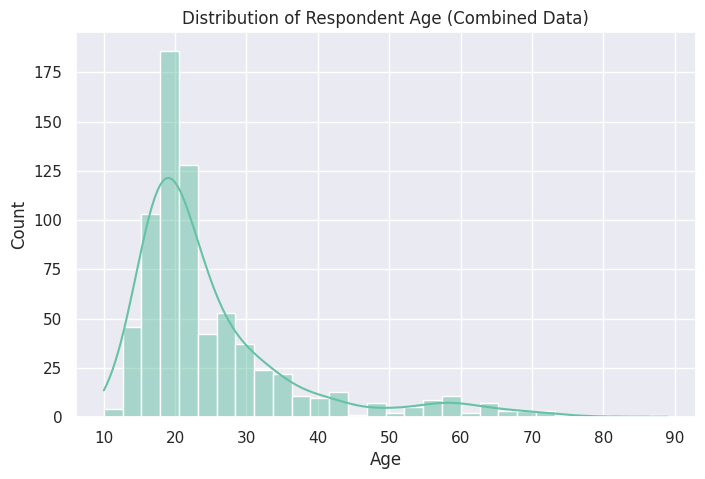

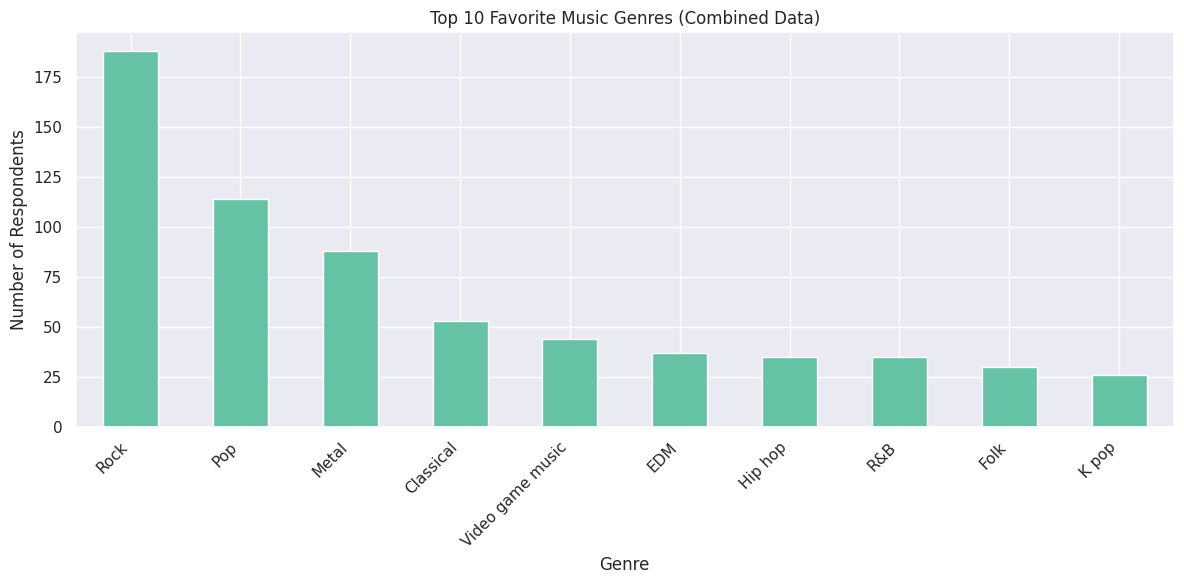

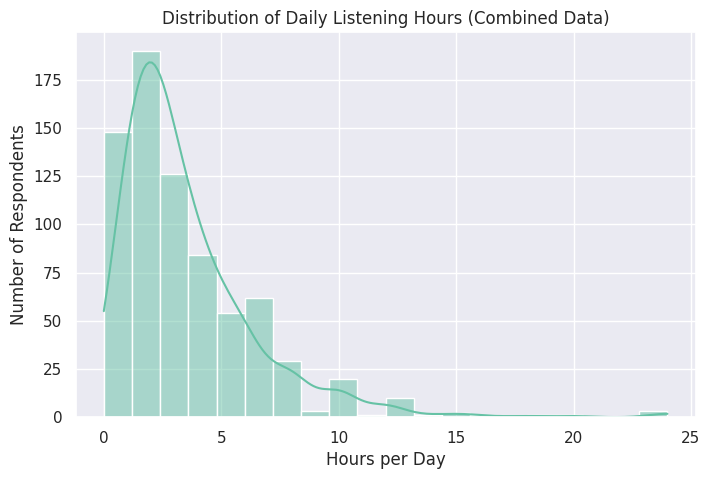

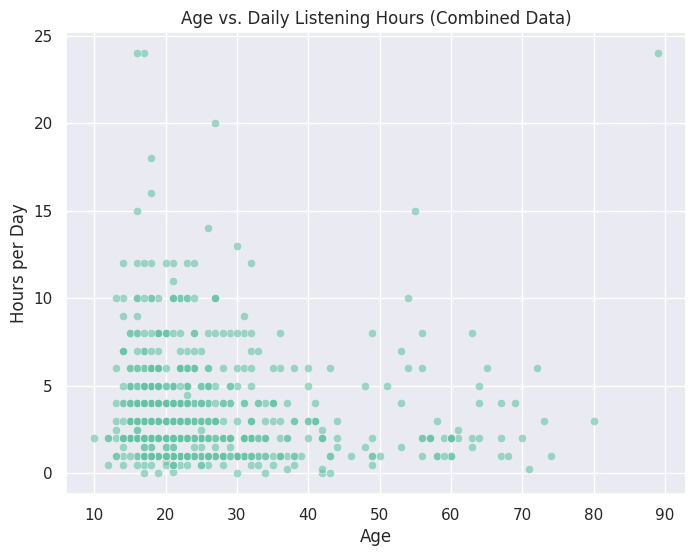

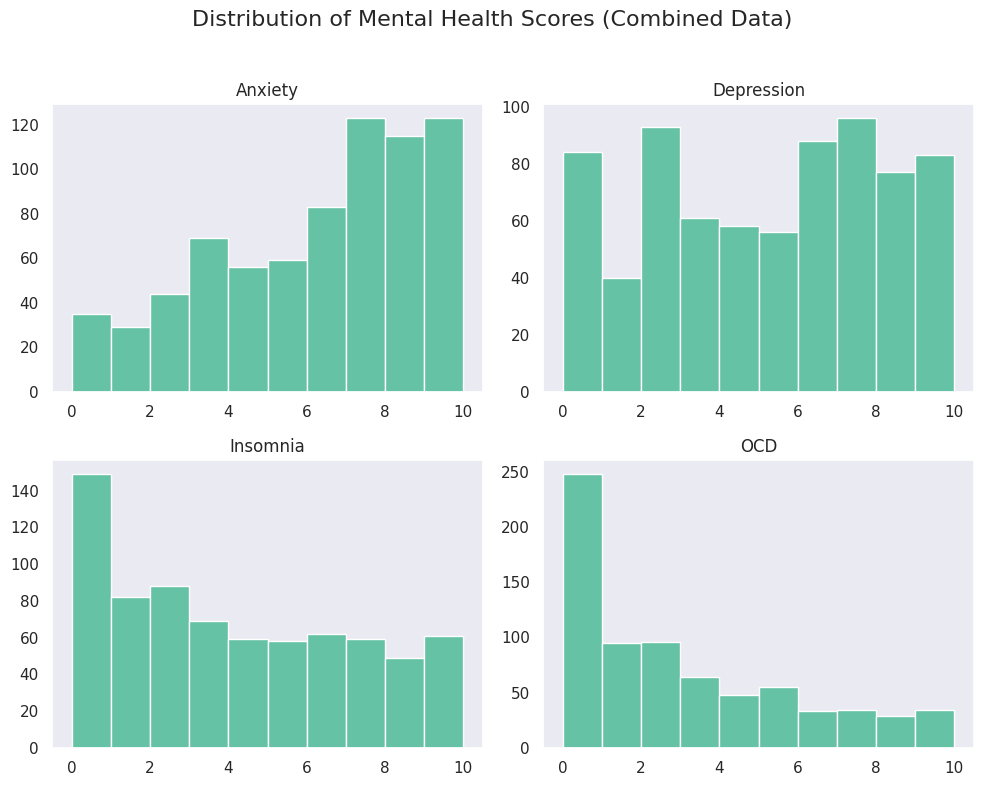

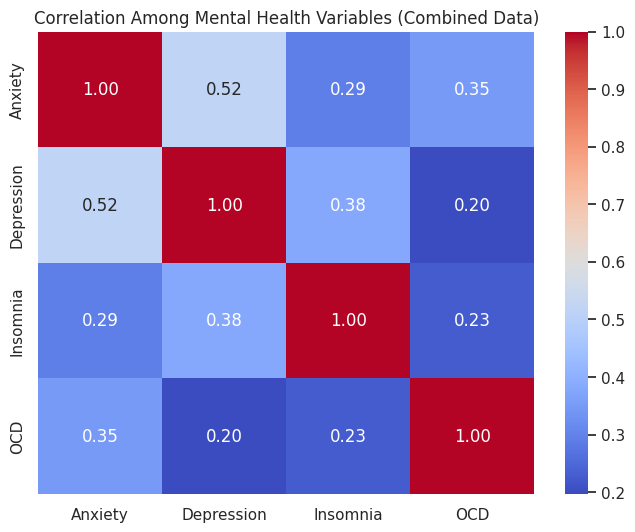

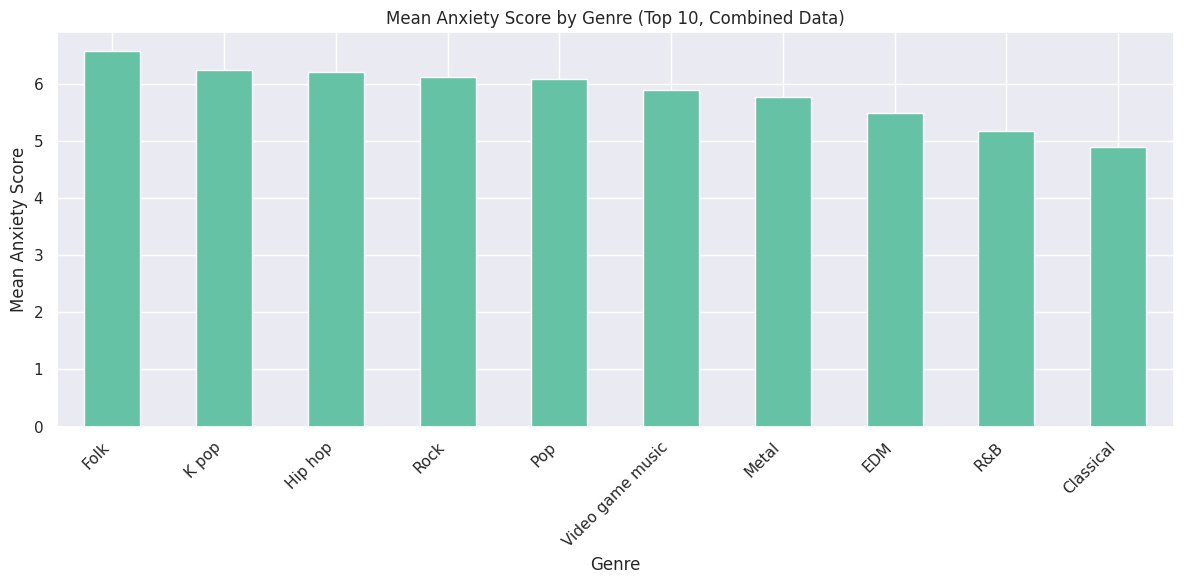

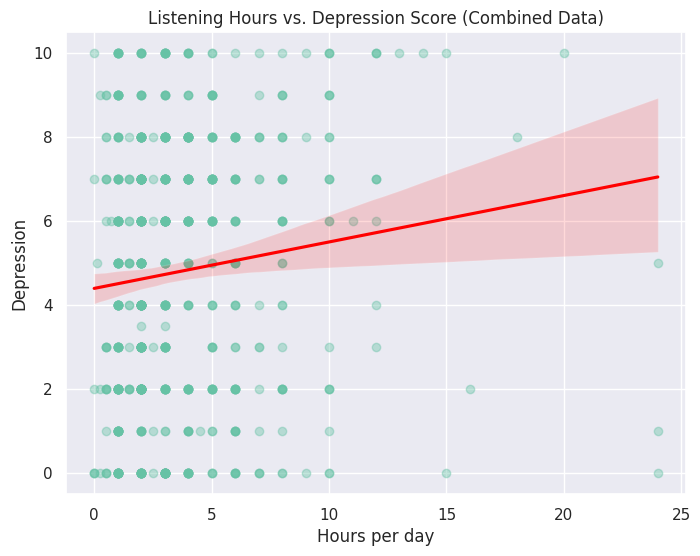

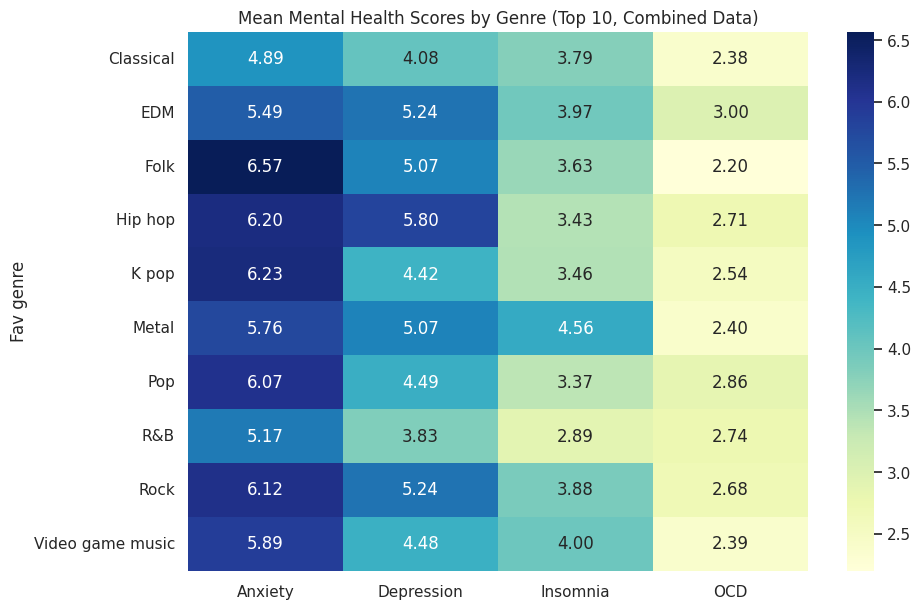

In [11]:
# ============================================
# CAPSTONE PROJECT - Music & Mental Health (Combined Datasets)
# ============================================

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Modern Styling Configuration ---
sns.set_theme(style="darkgrid", palette="Set2")

# --- Load and Combine Datasets ---
try:
    # 1. Load the two compatible datasets
    df1 = pd.read_csv("mxmh_survey_results_1.csv")
    df3 = pd.read_csv("mxmh_survey_results_3.csv")

    # 2. Combine them by stacking the rows
    df = pd.concat([df1, df3], ignore_index=True)

    print("--- Dataset Combination ---")
    print(f"Rows in mxmh_survey_results_1.csv: {df1.shape[0]}")
    print(f"Rows in mxmh_survey_results_3.csv: {df3.shape[0]}")
    print(f"Total rows in the combined dataset: {df.shape[0]}")
    print("-" * 30)

    # --- Data Cleaning (Optional but Recommended) ---
    # Remove potential duplicate entries after combining
    initial_rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")
    print(f"Final dataset shape after cleaning: {df.shape}")
    print("-" * 30)

    # Preview the combined data
    print("Preview of the combined dataset:")
    print(df.head())

    # --- Data Visualization (using the combined 'df') ---

    # Age Distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title("Distribution of Respondent Age (Combined Data)")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

    # Top 10 Favorite Music Genres
    plt.figure(figsize=(12, 6))
    df['Fav genre'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Favorite Music Genres (Combined Data)")
    plt.xlabel("Genre")
    plt.ylabel("Number of Respondents")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Distribution of Daily Listening Hours
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Hours per day'], bins=20, kde=True)
    plt.title("Distribution of Daily Listening Hours (Combined Data)")
    plt.xlabel("Hours per Day")
    plt.ylabel("Number of Respondents")
    plt.show()

    # --- The rest of your analysis code continues below ---

    # Age vs. Daily Listening Hours
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age', y='Hours per day', data=df, alpha=0.6)
    plt.title("Age vs. Daily Listening Hours (Combined Data)")
    plt.xlabel("Age")
    plt.ylabel("Hours per Day")
    plt.show()

    # Distribution of Mental Health Variables
    mental_health_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
    df[mental_health_cols].hist(figsize=(10, 8), bins=10, grid=False)
    plt.suptitle("Distribution of Mental Health Scores (Combined Data)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Correlation Heatmap of Mental Health Variables
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[mental_health_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Among Mental Health Variables (Combined Data)")
    plt.show()

    # --- Genre and Mental Health Analysis (Corrected Logic) ---

    # 1. Identify the top 10 most popular genres from the combined data
    top_10_genres = df['Fav genre'].value_counts().head(10).index.tolist()

    # 2. Filter the DataFrame to include only these top genres
    df_top_genres = df[df['Fav genre'].isin(top_10_genres)]

    # Plot Mean Anxiety Score for Top Genres
    plt.figure(figsize=(12, 6))
    df_top_genres.groupby("Fav genre")['Anxiety'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title("Mean Anxiety Score by Genre (Top 10, Combined Data)")
    plt.ylabel("Mean Anxiety Score")
    plt.xlabel("Genre")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Listening Hours vs. Depression Score (Optimized Plot)
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Hours per day', y='Depression', data=df,
                scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title("Listening Hours vs. Depression Score (Combined Data)")
    plt.show()

    # Heatmap: Mean Mental Health Scores for Top Genres
    pivot = df_top_genres.pivot_table(index="Fav genre", values=mental_health_cols, aggfunc="mean")
    plt.figure(figsize=(10, 7))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Mean Mental Health Scores by Genre (Top 10, Combined Data)")
    plt.show()

except FileNotFoundError as e:
    print(f"Error: Could not find the file {e.filename}. Please ensure 'mxmh_survey_results_1.csv' and 'mxmh_survey_results_3.csv' are in the correct directory!")
except Exception as e:
    print(f"An error occurred: {e}")